**Набір даних Grocery Database**
https://docs.google.com/spreadsheets/d/1qNHwCx3uHS05rmtglg4pYlqOdeJxKo9E/edit#gid=872187135

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import pandas as pd

In [2]:
df = pd.read_excel('C:/Users/User/Desktop/python for DA/data/Grocery Database.xlsx')

In [3]:
df_clean= df.copy()

In [4]:
df_clean.dtypes

Receipt Number                 object
Date                   datetime64[ns]
Year                            int64
Month                           int64
Time                           object
Mobile Number                   int64
Membership ID                  object
Loyalty Card Points             int64
Age                             int64
Gender                         object
City                           object
Country                        object
Category                       object
Sub_Category                   object
Items                          object
Brand                          object
Description                    object
Price                         float64
QTY                             int64
DISC                          float64
Amount                        float64
Net Bill Amount               float64
GST                           float64
Gross Bill Amount             float64
Payment Mode                   object
Bank Name                      object
% Profit Mar

In [5]:
type(df_clean)

pandas.core.frame.DataFrame

In [6]:
df_shape = df_clean.shape
df_shape

(50447, 32)

In [7]:
df_clean.isna().sum()

Receipt Number         0
Date                   0
Year                   0
Month                  0
Time                   0
Mobile Number          0
Membership ID          0
Loyalty Card Points    0
Age                    0
Gender                 0
City                   0
Country                0
Category               0
Sub_Category           0
Items                  0
Brand                  0
Description            0
Price                  0
QTY                    0
DISC                   0
Amount                 0
Net Bill Amount        0
GST                    0
Gross Bill Amount      0
Payment Mode           0
Bank Name              0
% Profit Margin        0
% Operating Cost       0
% Product Cost         0
Profit Margin          0
Operating Cost         0
Product Cost           0
dtype: int64

In [8]:
duplicateRows = df_clean[df_clean.duplicated (keep=False)]
duplicateRows

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
32663,GSB00094,2016-02-12,2016,2,14:01:00.088000,9853108031,MIDSG0091,2,60,Female,...,0.07,8.41662,Cash,ING Bank,0.093,0.15,0.757,0.38502,0.621,3.13398
32664,GSB00094,2016-02-12,2016,2,14:01:00.088000,9853108031,MIDSG0091,2,60,Female,...,0.07,8.41662,Cash,ING Bank,0.093,0.15,0.757,0.38502,0.621,3.13398


In [9]:
df_clean = df_clean.drop_duplicates()

In [10]:
duplicateRows = df_clean[df_clean.duplicated (keep=False)]
duplicateRows

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost


In [11]:
df_clean

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,...,0.10,13.324080,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,...,0.10,25.264800,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.10,42.187860,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.10,42.187860,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,...,0.10,42.187860,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50442,GSW01533,2019-12-28,2019,12,20:59:27.302000,9893317658,MIDSG0630,21,28,Female,...,0.07,79.358048,Card,Philippine National bank,0.141,0.15,0.709,0.87420,0.9300,4.39580
50443,GSW01534,2019-12-29,2019,12,13:14:45.030000,9809301701,MIDSG0293,41,28,Female,...,0.07,11.292352,Wallet,Philippine National bank,0.068,0.15,0.782,0.73984,1.6320,8.50816
50444,GSW01535,2019-12-30,2019,12,10:01:32.657000,9840124138,MIDSG0150,41,62,Female,...,0.07,14.999688,Card,BDO Unibank,0.109,0.15,0.741,0.43273,0.5955,2.94177
50445,GSW01535,2019-12-30,2019,12,10:01:32.657000,9840124138,MIDSG0150,41,62,Female,...,0.07,14.999688,Card,BDO Unibank,0.148,0.15,0.702,0.60680,0.6150,2.87820


In [12]:
df_clean['Time'] = df_clean['Time'].astype(str)

In [13]:
df_clean['Time'] = df_clean['Time'].str.replace(r'\.\d+', '', regex=True)

In [14]:
df_clean

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03,9793548581,MIDID0001,1,36,Male,...,0.10,13.324080,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50,9938441276,MIDID0002,2,54,Male,...,0.10,25.264800,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52,9976742552,MIDID0003,1,16,Female,...,0.10,42.187860,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693
3,GIJ00003,2016-01-02,2016,1,11:28:52,9976742552,MIDID0003,1,16,Female,...,0.10,42.187860,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760
4,GIJ00003,2016-01-02,2016,1,11:28:52,9976742552,MIDID0003,2,16,Female,...,0.10,42.187860,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50442,GSW01533,2019-12-28,2019,12,20:59:27,9893317658,MIDSG0630,21,28,Female,...,0.07,79.358048,Card,Philippine National bank,0.141,0.15,0.709,0.87420,0.9300,4.39580
50443,GSW01534,2019-12-29,2019,12,13:14:45,9809301701,MIDSG0293,41,28,Female,...,0.07,11.292352,Wallet,Philippine National bank,0.068,0.15,0.782,0.73984,1.6320,8.50816
50444,GSW01535,2019-12-30,2019,12,10:01:32,9840124138,MIDSG0150,41,62,Female,...,0.07,14.999688,Card,BDO Unibank,0.109,0.15,0.741,0.43273,0.5955,2.94177
50445,GSW01535,2019-12-30,2019,12,10:01:32,9840124138,MIDSG0150,41,62,Female,...,0.07,14.999688,Card,BDO Unibank,0.148,0.15,0.702,0.60680,0.6150,2.87820


In [15]:
df_clean['Time'] = pd.to_datetime(df_clean['Time'], format='%H:%M:%S')
df_clean['Datetime'] = df_clean['Date'] + pd.to_timedelta(df_clean['Time'].dt.strftime('%H:%M:%S'))

In [17]:
df_clean

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost,Datetime
0,GIJ00001,2016-01-02,2016,1,1900-01-01 10:08:03,9793548581,MIDID0001,1,36,Male,...,13.324080,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200,2016-01-02 10:08:03
1,GIJ00002,2016-01-02,2016,1,1900-01-01 15:46:50,9938441276,MIDID0002,2,54,Male,...,25.264800,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240,2016-01-02 15:46:50
2,GIJ00003,2016-01-02,2016,1,1900-01-01 11:28:52,9976742552,MIDID0003,1,16,Female,...,42.187860,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693,2016-01-02 11:28:52
3,GIJ00003,2016-01-02,2016,1,1900-01-01 11:28:52,9976742552,MIDID0003,1,16,Female,...,42.187860,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760,2016-01-02 11:28:52
4,GIJ00003,2016-01-02,2016,1,1900-01-01 11:28:52,9976742552,MIDID0003,2,16,Female,...,42.187860,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930,2016-01-02 11:28:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50442,GSW01533,2019-12-28,2019,12,1900-01-01 20:59:27,9893317658,MIDSG0630,21,28,Female,...,79.358048,Card,Philippine National bank,0.141,0.15,0.709,0.87420,0.9300,4.39580,2019-12-28 20:59:27
50443,GSW01534,2019-12-29,2019,12,1900-01-01 13:14:45,9809301701,MIDSG0293,41,28,Female,...,11.292352,Wallet,Philippine National bank,0.068,0.15,0.782,0.73984,1.6320,8.50816,2019-12-29 13:14:45
50444,GSW01535,2019-12-30,2019,12,1900-01-01 10:01:32,9840124138,MIDSG0150,41,62,Female,...,14.999688,Card,BDO Unibank,0.109,0.15,0.741,0.43273,0.5955,2.94177,2019-12-30 10:01:32
50445,GSW01535,2019-12-30,2019,12,1900-01-01 10:01:32,9840124138,MIDSG0150,41,62,Female,...,14.999688,Card,BDO Unibank,0.148,0.15,0.702,0.60680,0.6150,2.87820,2019-12-30 10:01:32


In [18]:
df_clean.dtypes

Receipt Number                 object
Date                   datetime64[ns]
Year                            int64
Month                           int64
Time                   datetime64[ns]
Mobile Number                   int64
Membership ID                  object
Loyalty Card Points             int64
Age                             int64
Gender                         object
City                           object
Country                        object
Category                       object
Sub_Category                   object
Items                          object
Brand                          object
Description                    object
Price                         float64
QTY                             int64
DISC                          float64
Amount                        float64
Net Bill Amount               float64
GST                           float64
Gross Bill Amount             float64
Payment Mode                   object
Bank Name                      object
% Profit Mar

**During the data processing and preparation for further analysis, it was decided to transform certain columns into a categorical format. This decision is based on several justified factors that enhance the quality and efficiency of data analysis: memory efficiency, data processing speed, and data analysis convenience.**

In [19]:
df_clean['Gender'] = pd.Categorical(df_clean['Gender'])
df_clean['Country'] = pd.Categorical(df_clean['Country'])
df_clean['City'] = pd.Categorical(df_clean['City'])
df_clean['Payment Mode'] = pd.Categorical(df_clean['Payment Mode'])

In [20]:
pd.set_option('display.max_columns', None)

random_10_rows = df_clean.sample(n=10)
random_10_rows

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,City,Country,Category,Sub_Category,Items,Brand,Description,Price,QTY,DISC,Amount,Net Bill Amount,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost,Datetime
33289,GSB00229,2016-05-04,2016,5,1900-01-01 18:25:42,9941577298,MIDSG0207,6,61,Female,Bedok,Singapore,Fruit & Vegetable,Fresh Vegetables,YUVVO French Bean,YUVVO,260 g,3.28,2,0.04,6.2976,71.8464,0.07,76.875648,Card,Philippine National bank,0.095,0.15,0.755,0.62320,0.9840,4.95280,2016-05-04 18:25:42
857,GIJ00242,2016-06-17,2016,6,1900-01-01 17:44:50,9847699962,MIDID0170,5,41,Female,Jakarta,Indonesia,Meat & Seafood,Frozen Seafood,Wow Seafood peeled prawns,Wow,480 g,10.89,2,0.04,20.9088,92.0448,0.10,101.249280,Wallet,ING Bank,0.114,0.15,0.736,2.48292,3.2670,16.03008,2016-06-17 17:44:50
26230,GPM01591,2018-05-10,2018,5,1900-01-01 21:23:21,9997054367,MIDPH0375,8,51,Male,Manila,Philippines,Fruit & Vegetable,Mushrooms,Shiitake mushroom,Silver Creek,180 g,3.49,1,0.04,3.3504,49.5360,0.12,55.480320,Card,Enterprise Bank,0.054,0.15,0.796,0.18846,0.5235,2.77804,2018-05-10 21:23:21
7504,GIJ01992,2019-06-08,2019,6,1900-01-01 21:51:20,9894385218,MIDID0047,36,15,Female,Jakarta,Indonesia,Pet Care,Pet Food,Nutro Beef with vegetables dog food,Nutro,270 g,7.30,1,0.02,7.1540,30.1252,0.10,33.137720,Cash,Philippine Veterans Bank,0.076,0.15,0.774,0.55480,1.0950,5.65020,2019-06-08 21:51:20
41451,GSB02377,2019-02-17,2019,2,1900-01-01 20:00:19,9887289147,MIDSG0270,18,45,Female,Bedok,Singapore,Frozen,Frozen Vegetables,Green peas,Erum,540 g,4.96,2,0.01,9.8208,90.5850,0.07,96.925950,Cash,ING Bank,0.124,0.15,0.726,1.23008,1.4880,7.20192,2019-02-17 20:00:19
39346,GSB01817,2018-06-18,2018,6,1900-01-01 14:58:17,9905430480,MIDSG0753,6,19,Female,Bedok,Singapore,Beverages,Iced Tea,heaven earth and jasmine tea,Heaven and Earth,530 ml,8.81,2,0.02,17.2676,93.8840,0.07,100.455880,Card,Enterprise Bank,0.150,0.15,0.700,2.64300,2.6430,12.33400,2018-06-18 14:58:17
21402,GPM00386,2016-08-29,2016,8,1900-01-01 18:49:19,9799547097,MIDPH0240,3,52,Female,Manila,Philippines,Frozen,Frozen Fruits,Whole korean strawberry,ARDO,530 g,8.71,1,0.04,8.3616,53.0016,0.12,59.361792,Wallet,BDO Unibank,0.051,0.15,0.799,0.44421,1.3065,6.95929,2016-08-29 18:49:19
50360,GSW01513,2019-12-11,2019,12,1900-01-01 20:56:53,9939170328,MIDSG1154,11,24,Female,Woodlands,Singapore,Beverages,Juices & Coconut Water,Marigold apple juice,Marigold,740 ml,5.79,2,0.01,11.4642,65.8548,0.07,70.464636,Wallet,Philippine Veterans Bank,0.067,0.15,0.783,0.77586,1.7370,9.06714,2019-12-11 20:56:53
8133,GIJ02165,2019-09-03,2019,9,1900-01-01 16:53:31,9921958973,MIDID0238,14,39,Female,Jakarta,Indonesia,"Choco, Snacks, Sweets",chocolate,Nestle Kit Kat bites chocolate,Nestle,300 g,10.24,2,0.01,20.2752,54.3906,0.10,59.829660,Cash,ING Bank,0.136,0.15,0.714,2.78528,3.0720,14.62272,2019-09-03 16:53:31
3965,GIJ01085,2018-01-14,2018,1,1900-01-01 18:46:15,9914989081,MIDID0284,5,52,Male,Jakarta,Indonesia,"Dairy, Chilled & Eggs",Butter & Margarine,SCS unsalted butter foil wrap,SCS,230 g,5.00,1,0.04,4.8000,4.8000,0.10,5.280000,Card,Philippine National bank,0.053,0.15,0.797,0.26500,0.7500,3.98500,2018-01-14 18:46:15


In [21]:
pd.reset_option('display.max_columns')

**During the analysis of the database, it was noticed that some data in the "Net Bill Amount" and "Gross Bill Amount" columns appear to be incorrect or calculated incorrectly.**

**The decision was made to recalculate the data for these two columns and create new columns with correct data, representing the sums in the "Net Bill Amount Correct" and "Gross Bill Amount Correct" columns.**

**This action helps to ensure the accuracy of data analysis and eliminates potential errors that could affect the results of your further research or visualizations.**

In [22]:
df_clean['Net Bill Amount Correct'] = 0.0
df_clean['Net Bill Amount Correct'] = df_clean['Price'] * df_clean['QTY'] * (1 - (df_clean['DISC']))

In [23]:
df_clean['Gross Bill Amount Correct'] = 0.0
df_clean['Gross Bill Amount Correct'] = df_clean['Net Bill Amount Correct'] * (1 + (df_clean['GST']))

In [24]:
print(df_clean[['Gross Bill Amount', 'Gross Bill Amount Correct']])

       Gross Bill Amount  Gross Bill Amount Correct
0              13.324080                  13.324080
1              25.264800                  25.264800
2              42.187860                  14.494590
3              42.187860                   3.833280
4              42.187860                   4.802490
...                  ...                        ...
50442          79.358048                   6.501320
50443          11.292352                  11.292352
50444          14.999688                   4.205421
50445          14.999688                   4.343130
50446          14.999688                   6.451137

[50446 rows x 2 columns]


In [25]:
print(df_clean[['Net Bill Amount', 'Net Bill Amount Correct']])

       Net Bill Amount  Net Bill Amount Correct
0              12.1128                  12.1128
1              22.9680                  22.9680
2              38.3526                  13.1769
3              38.3526                   3.4848
4              38.3526                   4.3659
...                ...                      ...
50442          74.1664                   6.0760
50443          10.5536                  10.5536
50444          14.0184                   3.9303
50445          14.0184                   4.0590
50446          14.0184                   6.0291

[50446 rows x 2 columns]


# Sales analysis

**1.1 How do sales change over time? Seasonal peaks and troughs.?**

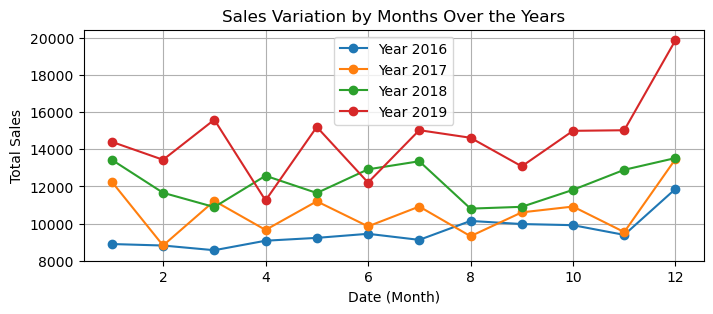

In [29]:
monthly_sales = df_clean.groupby(['Year', 'Month'])['Net Bill Amount Correct'].sum()

years = df_clean['Year'].unique()

plt.figure(figsize=(8, 3))
for year in years:
    monthly_sales_year = monthly_sales[year]
    plt.plot(monthly_sales_year.index, monthly_sales_year.values, marker='o', label=f'Year {year}')

plt.title('Sales Variation by Months Over the Years')
plt.xlabel('Date (Month)')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend()
plt.show()

**Sales Peaks: It is evident that sales peaks occur in December and January, which may be associated with the holiday season and New Year festivities. This can be a time of active shopping by customers and significant sales growth.**

**Stability Throughout the Year: Despite the peaks in December and January, the overall sales pattern remains stable throughout the rest of the year. This may indicate that most purchases made during the year are regular or not related to seasonal events.**

**Repetitiveness of the Pattern: It is worth noting that the pattern of sales peaks in December-January repeats for all years, indicating the consistency of this phenomenon.**

**1.2 Which product categories are the most popular by region?**

In [30]:
region_grouped = df_clean.groupby('Country')

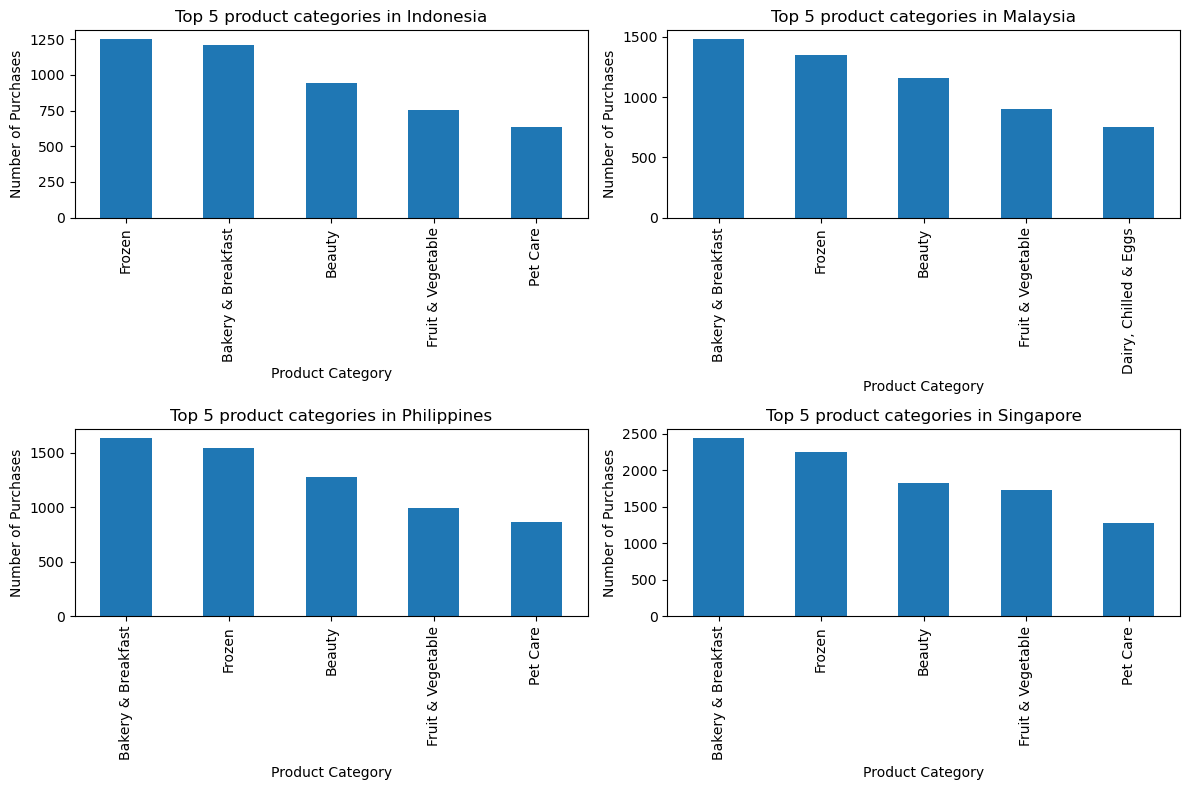

In [31]:
rows = 2  
cols = 2  
fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
for i, (name, group) in enumerate(region_grouped):
    row = i // cols  
    col = i % cols  

    popular_categories = group['Category'].value_counts().head(5)  # Getting the top 5 categories
    popular_categories.plot(kind='bar', ax=axes[row, col], title=f"Top 5 product categories in {name}")
    axes[row, col].set_xlabel("Product Category")
    axes[row, col].set_ylabel("Number of Purchases")

plt.tight_layout()
plt.show()

**1.3 Which payment method prevails, depending on the region?**

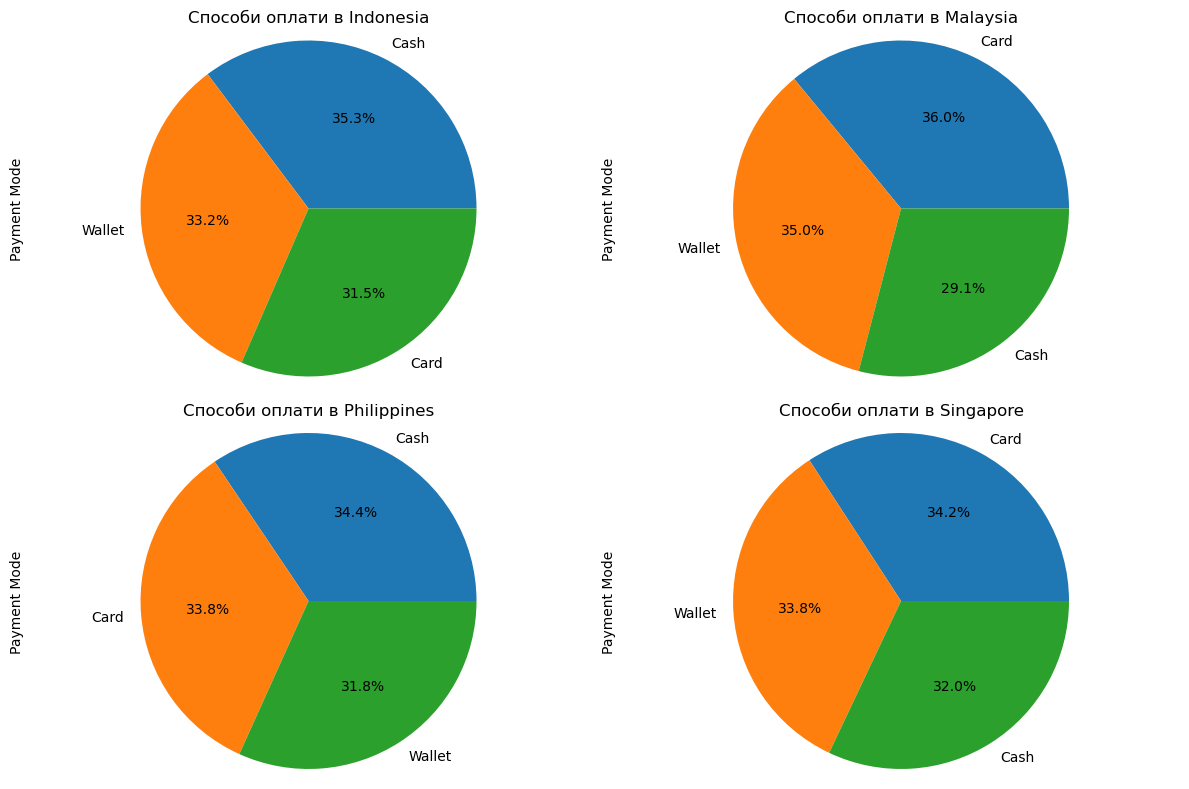

In [35]:
rows = 2  
cols = 2  

fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

for i, (name, group) in enumerate(region_grouped):
    row = i // cols  
    col = i % cols   

    payment_modes = group['Payment Mode'].value_counts()  
    payment_modes.plot(kind='pie', autopct='%1.1f%%', ax=axes[row, col], title=f"Способи оплати в {name}")
    axes[row, col].axis('equal')  

plt.tight_layout() 
plt.show()

**1.4 At what hours are the most sales?**

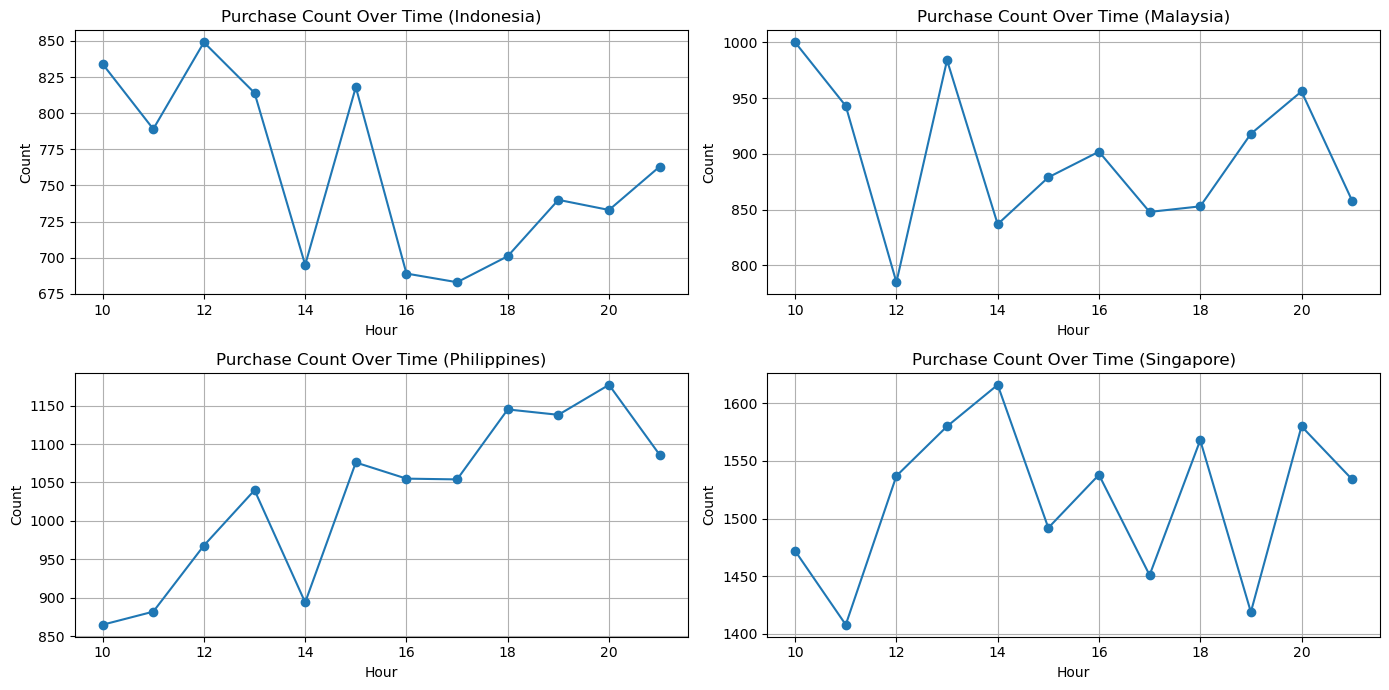

In [36]:
df_clean['hour'] = df_clean['Datetime'].dt.hour
hourly_purchase_by_country = df_clean.groupby(['Country', 'hour'])['Receipt Number'].count().reset_index()

countries = df_clean['Country'].unique()

graphs_per_row = 2

num_rows = len(countries) // graphs_per_row
if len(countries) % graphs_per_row != 0:
    num_rows += 1

fig, axs = plt.subplots(num_rows, graphs_per_row, figsize=(14, 7))

for i, country in enumerate(countries):
    row = i // graphs_per_row
    col = i % graphs_per_row
    country_data = hourly_purchase_by_country[hourly_purchase_by_country['Country'] == country]
    ax = axs[row, col]
    ax.plot(country_data['hour'], country_data['Receipt Number'], marker='o')
    ax.set_xlabel('Hour')
    ax.set_ylabel('Count')
    ax.set_title(f'Purchase Count Over Time ({country})')
    
    ax.grid(True)

plt.tight_layout()
plt.show()


**The purchase graphs in different countries exhibit similar patterns with peaks of activity around 12-14 hours (afternoon) and approximately 20 hours (evening).**

**However, there are noticeable variations among countries.The differences in the peak purchase hours may reflect variations in consumer habits and preferences across different countries. Understanding these variations can be valuable for analyzing consumer trends and planning optimal times for marketing initiatives in specific regions.**







**1.5 Which bank's cards are most often used by our clients?**

In [37]:
transactions_by_country_bank = df_clean.groupby(['Country', 'Bank Name'])['Receipt Number'].count().reset_index()

popular_banks_by_country = transactions_by_country_bank.groupby('Country').apply(lambda x: x[x['Receipt Number'] == x['Receipt Number'].max()])

result_table = popular_banks_by_country[['Country', 'Bank Name']]
result_table.reset_index(drop=True, inplace=True)
print(result_table)


       Country                 Bank Name
0    Indonesia               BDO Unibank
1     Malaysia               BDO Unibank
2  Philippines  Philippine National bank
3    Singapore               BDO Unibank


**BDO Unibank is frequently encountered as a popular choice, it may be worth considering the possibility of partnership or collaboration with this bank. This could lead to beneficial agreements such as joint promotional campaigns or exclusive offers.**

# Customer analysis

**2.1 Which age groups are the most active buyers?**

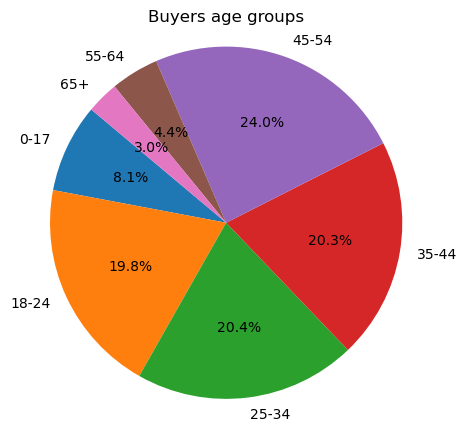

In [38]:
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']

df['Age group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

purchase_count_by_age_group = df.groupby('Age group')['Receipt Number'].count()

plt.figure(figsize=(5, 5))
plt.pie(purchase_count_by_age_group, labels=purchase_count_by_age_group.index, autopct='%1.1f%%', startangle=140)
plt.title('Buyers age groups')
plt.axis('equal') 
plt.show()


**2.2 Which gender of buyers prevails? Is there a difference in buyers by gender?**

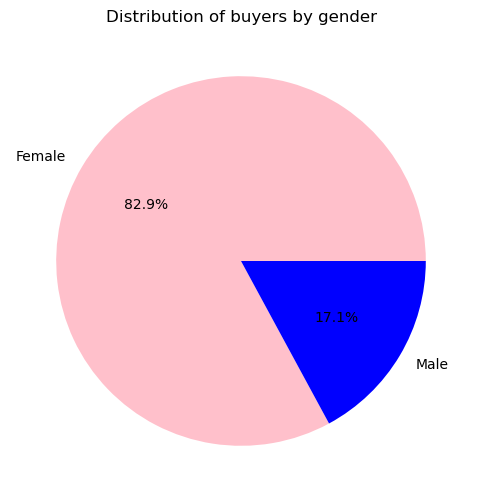

In [39]:
gender_distribution = df_clean['Gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['pink', 'blue'])
plt.title('Distribution of buyers by gender')
plt.show()


In [50]:
average_purchase_female = df_clean[df_clean['Gender'] == 'Female']['Net Bill Amount Correct'].mean()
average_purchase_male = df_clean[df_clean['Gender'] == 'Male']['Net Bill Amount Correct'].mean()

print("Average purchase amount for females: ${:.2f}".format(average_purchase_female))
print("Average purchase amount for males: ${:.2f}".format(average_purchase_male))

Average purchase amount for females: $11.22
Average purchase amount for males: $10.92


**2.3 Number of unique buyers, trend by year.**

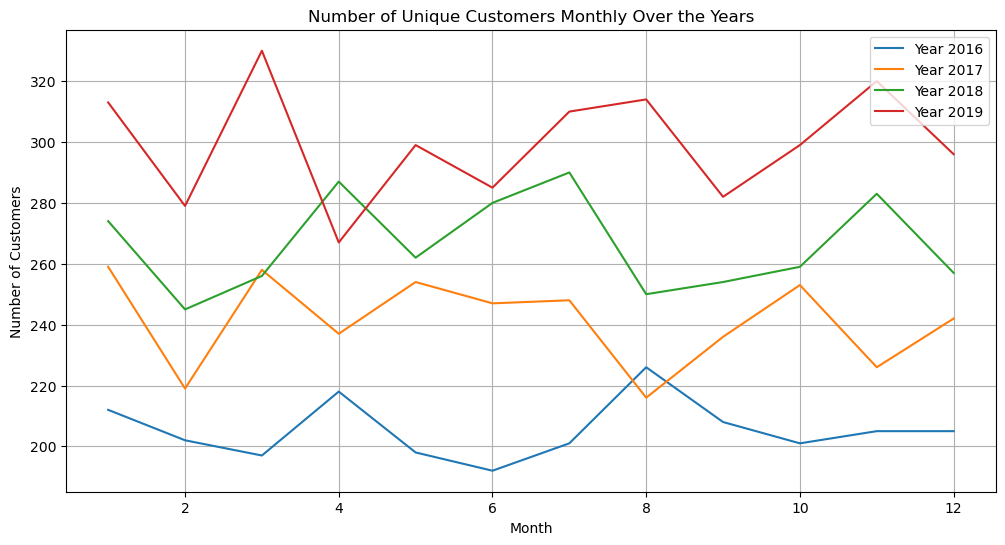

In [43]:
unique_customers_by_month = df_clean.groupby(['Year', 'Month'])['Mobile Number'].nunique().reset_index()

plt.figure(figsize=(12, 6))
for year in df_clean['Year'].unique():
    year_data = unique_customers_by_month[unique_customers_by_month['Year'] == year]
    plt.plot(year_data['Month'], year_data['Mobile Number'], label=f'Year {year}')

plt.title('Number of Unique Customers Monthly Over the Years')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.legend()
plt.grid(True)
plt.show()


# Profit analysis

**3.1 Which products have the highest profit percentage?**

In [44]:
profit_margin_by_category = df_clean.groupby('Category')['% Profit Margin'].mean()

highest_profit_category = profit_margin_by_category.idxmax()
highest_profit_margin = profit_margin_by_category.max() * 100

lowest_profit_category = profit_margin_by_category.idxmin()
lowest_profit_margin = profit_margin_by_category.min() * 100

print(f"Category with the highest average profit margin: {highest_profit_category}")
print(f"Highest average profit margin in this category: {highest_profit_margin:.1f} %\n")
print(f"Category with the lowest average profit margin: {lowest_profit_category}")
print(f"Lowest average profit margin in this category: {lowest_profit_margin:.1f} %\n")
print((profit_margin_by_category.sort_values(ascending=False) * 100).map('{:.1f}%'.format))


Category with the highest average profit margin: Party Supplies
Highest average profit margin in this category: 12.6 %

Category with the lowest average profit margin: Household
Lowest average profit margin in this category: 7.2 %

Category
Party Supplies               12.6%
Pet Care                     12.5%
Frozen                       12.3%
Bakery & Breakfast           11.6%
Choco, Snacks, Sweets        11.0%
Kitchen & Dining             10.9%
Fruit & Vegetable            10.7%
Mother & Baby                10.7%
Wines, Beers & Spirits       10.1%
Meat & Seafood               10.1%
Beauty                       10.0%
Rice & Cooking Essentials     9.5%
Beverages                     8.7%
Health                        8.5%
Dairy, Chilled & Eggs         7.3%
Household                     7.2%
Name: % Profit Margin, dtype: object


**3.2 The trend of net profit, and depending on the year.**

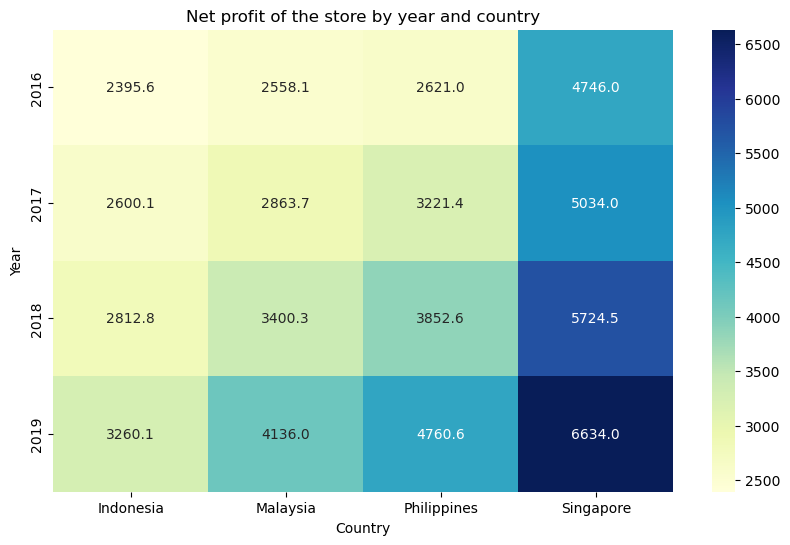

In [45]:
net_profit_by_year_country = df_clean.groupby(['Year', 'Country'])['Profit Margin'].sum().reset_index()

heatmap_data = net_profit_by_year_country.pivot(index='Year', columns='Country', values='Profit Margin')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Net profit of the store by year and country')
plt.xlabel('Country')
plt.ylabel('Year')
plt.show()
